<a href="https://colab.research.google.com/github/kshiteejtoradmal-art/BML-submission/blob/main/Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

sns.set(style="whitegrid")

In [ ]:
housing = fetch_california_housing(as_frame=True)   # dataset included in sklearn
df = housing.frame   # pandas DataFrame with features + target
df.rename(columns={'MedHouseVal':'MedHouseVal'}, inplace=True)  # target column name
print("Shape:", df.shape)
df.head()

Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


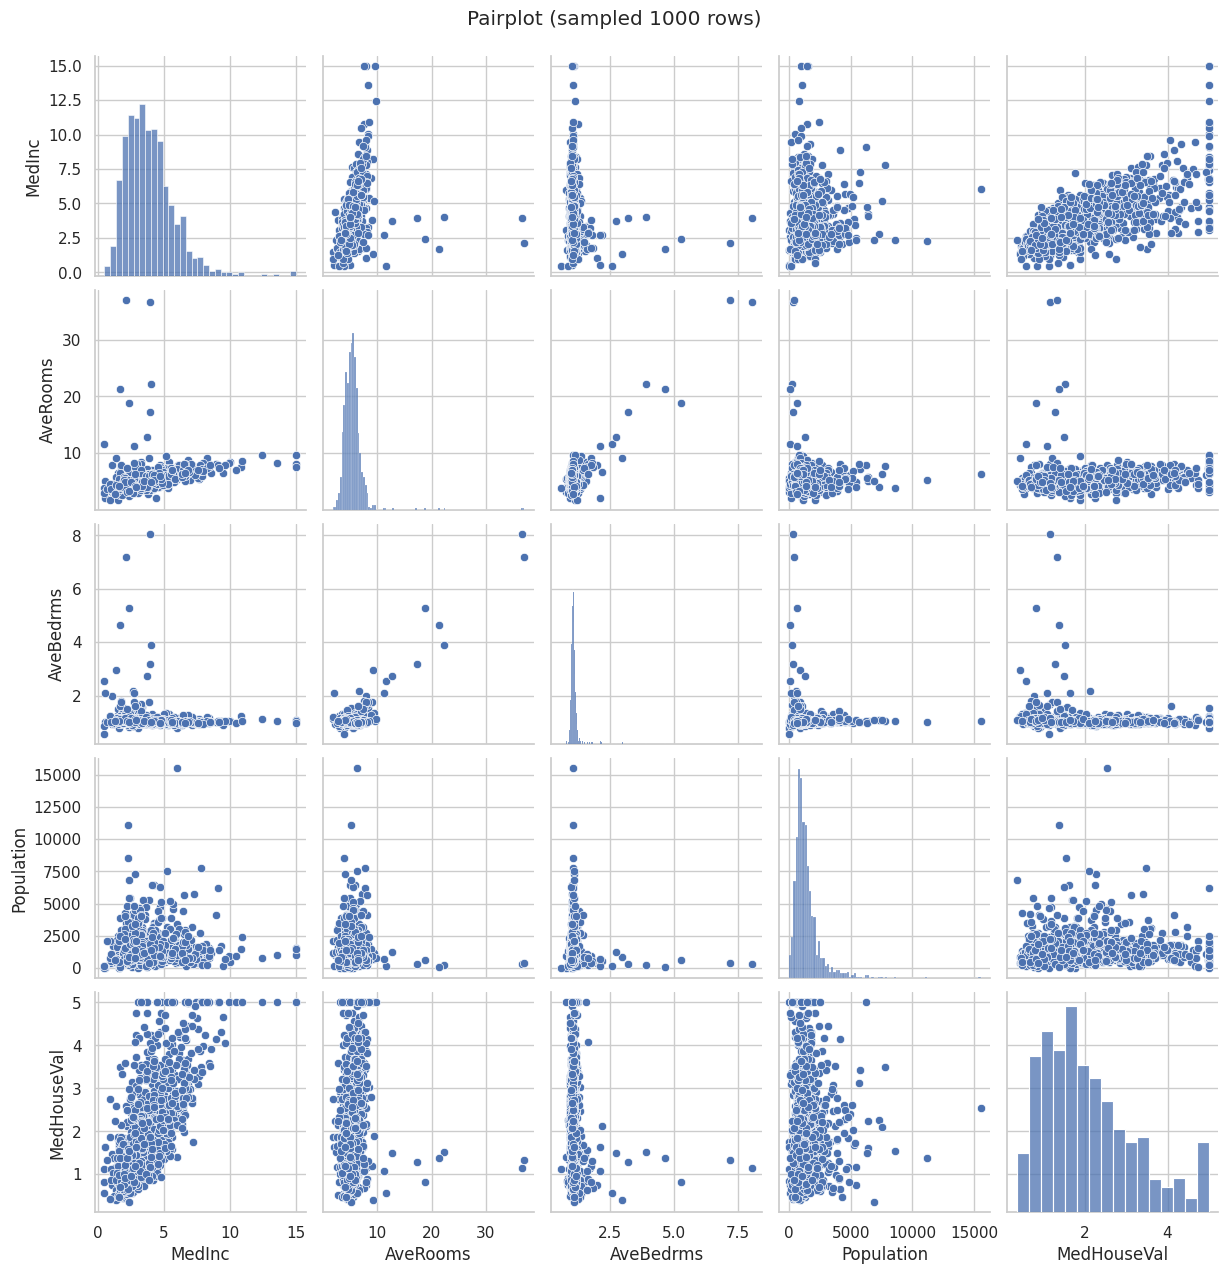

In [ ]:
# === Cell 3: Quick EDA ===
print(df.info())
display(df.describe().T)

# Pairplot for a few variables (can take time if many points — we sample 1000 rows)
sns.pairplot(df.sample(1000), vars=['MedInc','AveRooms','AveBedrms','Population','MedHouseVal'])
plt.suptitle("Pairplot (sampled 1000 rows)", y=1.02)
plt.show()


In [ ]:
# === Cell 4: Simple Linear Regression (one predictor: MedInc -> MedHouseVal) ===
X = df[['MedInc']].values   # 2D array (n_samples, 1)
y = df['MedHouseVal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred_simple = model_simple.predict(X_test)

print("Intercept (b0):", model_simple.intercept_)
print("Coefficient (b1):", model_simple.coef_[0])
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("R2 score:", r2_score(y_test, y_pred_simple))


Intercept (b0): 0.4445972916907879
Coefficient (b1): 0.4193384939381271
RMSE: 0.8420901241414455
MAE: 0.629908653009376
R2 score: 0.45885918903846656


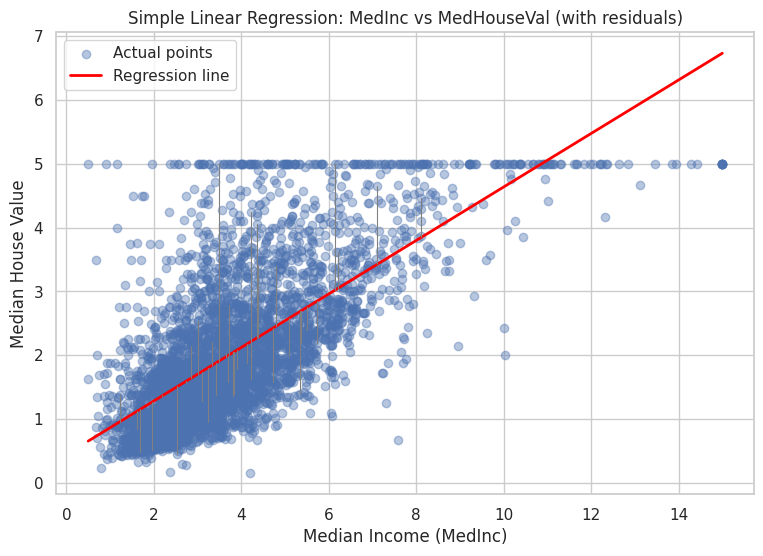

In [ ]:
# === Cell 5: Plot simple regression + residual lines (diagram of fit & residuals) ===
plt.figure(figsize=(9,6))
plt.scatter(X_test, y_test, alpha=0.4, label='Actual points')
# regression line
xs = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
plt.plot(xs, model_simple.predict(xs), color='red', linewidth=2, label='Regression line')
# plot residual lines for first 40 points to illustrate residuals
for i in range(40):
    xi = X_test[i][0]
    yi = y_test[i]
    ypi = y_pred_simple[i]
    plt.plot([xi, xi], [yi, ypi], color='grey', linewidth=0.8)

plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Simple Linear Regression: MedInc vs MedHouseVal (with residuals)')
plt.show()


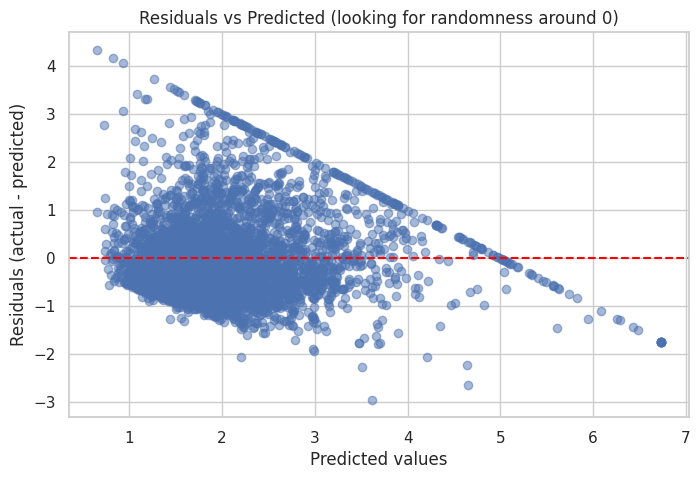

In [ ]:
# === Cell 6: Residual diagnostics (Residuals vs Predicted) ===
residuals = y_test - y_pred_simple
plt.figure(figsize=(8,5))
plt.scatter(y_pred_simple, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residuals vs Predicted (looking for randomness around 0)')
plt.show()


In [ ]:
# === Cell 7: Multiple Linear Regression (all features) ===
X_all = df.drop(columns=['MedHouseVal'])
y_all = df['MedHouseVal']

Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(Xtr, ytr)
y_pred_multi = model_multi.predict(Xte)

print("Intercept:", model_multi.intercept_)
coeffs = pd.Series(model_multi.coef_, index=X_all.columns).sort_values(ascending=False)
print("\nTop coefficients:\n", coeffs.head(10))

print("\nRMSE:", np.sqrt(mean_squared_error(yte, y_pred_multi)))
print("MAE:", mean_absolute_error(yte, y_pred_multi))
print("R2:", r2_score(yte, y_pred_multi))


Intercept: -37.02327770606409

Top coefficients:
 AveBedrms     0.783145
MedInc        0.448675
HouseAge      0.009724
Population   -0.000002
AveOccup     -0.003526
AveRooms     -0.123323
Latitude     -0.419792
Longitude    -0.433708
dtype: float64

RMSE: 0.7455813830127764
MAE: 0.5332001304956553
R2: 0.5757877060324508


In [ ]:
# === Cell 8: Closed-form solution (normal equation) using numpy (showing matrix math) ===
# We'll compute beta using pseudo-inverse for stability: beta = pinv(X) @ y
X_design = np.hstack([np.ones((Xtr.shape[0],1)), Xtr.values])  # add intercept column
y_vec = ytr.values.reshape(-1,1)

beta_pinv = np.linalg.pinv(X_design) @ y_vec   # shape (p+1, 1)
print("First 5 beta values (including intercept):\n", beta_pinv.ravel()[:5])
# Compare first few to sklearn result (intercept + first coefficients)
sk_beta = np.concatenate([[model_multi.intercept_], model_multi.coef_])
print("\nDifference (sklearn - pinv):", np.round(sk_beta - beta_pinv.ravel(), 6)[:5])


First 5 beta values (including intercept):
 [-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01]

Difference (sklearn - pinv): [-0. -0.  0.  0. -0.]


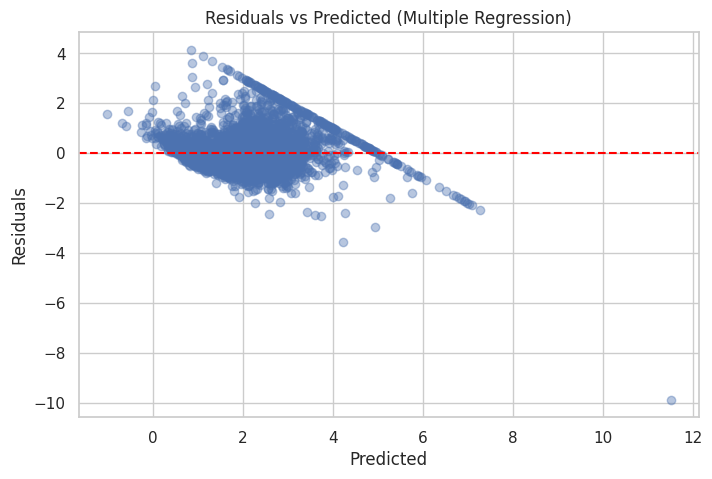

In [ ]:
# === Cell 9: Residual plot for multiple regression ===
res_multi = yte - y_pred_multi
plt.figure(figsize=(8,5))
plt.scatter(y_pred_multi, res_multi, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Multiple Regression)')
plt.show()


In [ ]:
# === Cell 10: Logistic regression performance matrices demo (answering your "key matrices" question) ===
# We'll use a small built-in classification dataset for demonstration
cancer = load_breast_cancer(as_frame=True)
Xc = cancer.data
yc = cancer.target

Xct, Xcv, yct, ycv = train_test_split(Xc, yc, test_size=0.2, random_state=42)

lg = LogisticRegression(max_iter=10000)
lg.fit(Xct, yct)
ycv_pred = lg.predict(Xcv)
ycv_proba = lg.predict_proba(Xcv)[:,1]  # probability for positive class

print("Confusion Matrix:\n", confusion_matrix(ycv, ycv_pred))
print("\nClassification Report:\n", classification_report(ycv, ycv_pred))
print("ROC-AUC:", round(roc_auc_score(ycv, ycv_proba), 4))


Confusion Matrix:
 [[39  4]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC: 0.9977
